http://insideairbnb.com/get-the-data.html  
https://www.zillow.com/research/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import shapefile
from datetime import datetime

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Import AirBNB and remove unneeded columns

In [2]:
# http://insideairbnb.com/get-the-data.html
listings = pd.read_csv('../data/listings.csv')

In [3]:
listings.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-03,4.69,1,267
1,25613,Room in Historic East Nashville Craftsman Home,95811,Nell,NaN,District 6,36.17826,-86.74162,Private room,75,2,510,2020-03-14,3.87,1,63
2,136015,Apart. on the Ridge near Opryland,666322,Dave And Peggy,NaN,District 15,36.19464,-86.67195,Entire home/apt,103,30,50,2020-08-04,0.43,2,190
3,258817,ButterflyRoom-private bath- open Jan 26,22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,27,30,96,2019-12-14,0.86,7,364
4,289242,"MorningstarHouse, monthly room- open Feb 2",22296,Diana,NaN,District 12,36.16102,-86.59207,Private room,24,30,76,2019-01-12,0.68,7,364
5,319705,"SuperSweetSTUDIO, jacuzzi, monthly",22296,Diana,NaN,District 12,36.16296,-86.59187,Private room,31,30,48,2020-07-03,0.44,7,364
6,340081,"MorningstarHouse, monthly single room- open soon!",22296,Diana,NaN,District 12,36.16128,-86.58986,Private room,24,30,77,2020-08-31,0.70,7,365
7,395889,Contemporary-Mod Paradise w/ Private Bathroom,1547584,Kurt,NaN,District 6,36.16492,-86.75010,Private room,69,1,233,2021-02-14,2.20,1,331
8,421290,Private Red Suite/King Bed/Wetbar/Bath/5 min t...,1684051,Rick,NaN,District 19,36.17230,-86.79250,Entire home/apt,82,2,819,2021-02-13,7.72,6,66
9,430052,"Private Vaulted Suite! King,Wet Bar,Bath/5 min...",1684051,Rick,NaN,District 19,36.17230,-86.79250,Entire home/apt,79,2,810,2021-02-15,7.65,6,58


In [4]:
# http://insideairbnb.com/get-the-data.html
listings_detail = pd.read_csv('../data/listings.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [5]:
listings_detail[listings_detail['id']==431258]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10,431258,https://www.airbnb.com/rooms/431258,20210219004252,2021-02-20,"2 Bdrm, 2.5 Baths, DT 5 mins! Great Hottub & P...","Free Parking! Entire home - 2 Bdrm/2.5 baths, ...",Great neighborhood! 15 min walk over to the Ge...,https://a0.muscache.com/pictures/531a4e61-125e...,1684051,https://www.airbnb.com/users/show/1684051,Rick,2012-02-01,"Nashville, Tennessee, United States",I know your not coming to Nashville to visit m...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/87324...,https://a0.muscache.com/im/pictures/user/87324...,NaN,7.0,7.0,"['email', 'phone', 'reviews', 'sent_id']",t,t,"Nashville, Tennessee, United States",District 19,NaN,36.1758,-86.7995,Entire house,Entire home/apt,4,NaN,2.5 baths,2.0,2.0,"[""Hair dryer"", ""Bathtub"", ""Carbon monoxide ala...",$200.00,2,30,2,4,1125,1125,2.3,1125.0,NaN,t,0,0,16,280,2021-02-20,416,3,0,2012-05-28,2020-03-18,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,6,6,0,0,3.91


In [6]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
       'availa

In [7]:
listings_ratings = listings_detail[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                                    'review_scores_value']]

In [8]:
listings_ratings.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,5189.000000,5124.000000,5125.000000,5123.000000,5125.000000,5123.000000,5122.000000
mean,96.312777,9.807767,9.682537,9.862581,9.849756,9.729651,9.660679
std,6.777374,0.653770,0.722463,0.556678,0.602543,0.652776,0.740528
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
50%,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
listings_ratings['review_scores_location'].value_counts()

10.0    4063
9.0      862
8.0      136
7.0       28
6.0       23
2.0        6
5.0        3
4.0        2
Name: review_scores_location, dtype: int64

In [10]:
# Did not use
#reviews_summary = pd.read_csv('../data/reviews.csv')

In [11]:
#reviews_summary

In [12]:
# http://insideairbnb.com/get-the-data.html
reviews = pd.read_csv('../data/reviews.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [13]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...
...,...,...,...,...,...,...
332595,48095829,731963419,2021-02-16,376650335,Nathaniel,Very cute
332596,48095943,731999187,2021-02-16,43224485,Brody,The property is not safe. Not only did 2 of th...
332597,48108210,731238971,2021-02-14,125188375,Rachel,Host was extremely sweet and replied almost in...
332598,48130048,731602541,2021-02-15,383674106,Gage,"good spot, clean rooms, kind staff"


In [14]:
reviews['comments'][0]

"I can't say enough about how wonderful it was to stay here. It was the highlight of our stay in Nashville! Michele and her husband Collier felt like parents to my sister and I. They were so caring and helpful, giving us the best suggestions about places to eat and hang out in Nashville, and just being such warm, wonderful people that we had as much fun inside the house as we did going around Nashville! Also, the house was absolutely beautiful, and our room had a giant window looking out onto their backyard, which leads directly into a gorgeous park that we walked through every day. We felt so relaxed and happy there, it felt like home. We didn't want to leave!"

In [15]:
# Did not use
#calendar = pd.read_csv('../data/calendar.csv.gz', compression='gzip',
#                   error_bad_lines=False)

In [16]:
#calendar

## Prepare the AirBNB data for merging with other data

In [17]:
# Start by inspecting reviews table
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [18]:
reviews.shape

(332600, 6)

In [19]:
print(reviews.listing_id.nunique())
print(reviews.id.nunique())
print(reviews.reviewer_id.nunique())

5205
332600
305179


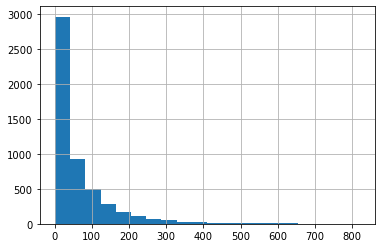

In [20]:
# Distribution of listings by number of reviews
reviews.groupby('listing_id')['id'].count().hist(bins=20)

In [21]:
# Look at how many listings have 10 or fewer reviews 
## I know that isn't exactly what this code is meant to do, but that's what the results display...
reviews.groupby('listing_id')['id'].count().value_counts(ascending=False).head(10)

1     315
2     211
4     176
3     148
5     138
6     116
8     105
7      99
10     91
9      88
Name: id, dtype: int64

In [22]:
# Identify listings with the most reviews
reviews.groupby('listing_id')['id'].count().sort_values(ascending=False).head(10)

listing_id
421290      819
5174212     815
430052      810
13017638    747
3121821     734
6247676     686
6422        674
4033674     662
3571432     648
3717911     643
Name: id, dtype: int64

In [23]:
print(reviews.date.min())
print(reviews.date.max())

2009-04-30
2021-02-20


In [24]:
reviews['year'] = reviews.date.str[:4]

In [25]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...,2009
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...,2009
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...,2009
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...,2009
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...,2009


2009        11
2010        23
2011        62
2012       430
2013      1049
2014      2878
2015      8739
2016     22640
2017     43456
2018     66913
2019    103544
2020     74107
2021      8748
Name: year, dtype: int64


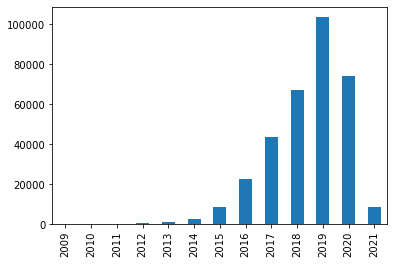

In [26]:
print(reviews['year'].value_counts().sort_index())
reviews['year'].value_counts().sort_index().plot(kind='bar')

In [27]:
# Create a function to concatenate comments field with a space in between
def concat_comments(df):
    return ' '.join(df['comments'].astype(str).to_list())

In [28]:
# Group the a_and_p dataset and concatenate the permit text for each based on apn, percent_change, and permit_class
reviews_grouped = reviews.groupby(['listing_id']).apply(concat_comments).reset_index()

In [29]:
# Rename the aggregated field
reviews_grouped = reviews_grouped.rename({0:'comments_concatenated'}, axis = 1)

In [30]:
reviews_grouped.head(10)

,listing_id,comments_concatenated
0,6422,I can't say enough about how wonderful it was ...
1,25613,Nell and Michael made my stay pleasant and eas...
2,136015,"Very relaxing, beautiful property, and warm / ..."
3,258817,Diana is such a gracious hostess. She has a b...
4,289242,I had such a fantastic time at Diana's place. ...
5,319705,What a wonderful stay at Diana's in Nashville!...
6,340081,A thoroughly lovely lady that provided a nice ...
7,395889,Staying at Kurt was very pleasant! The locatio...
8,421290,If you're looking for a great place to stay in...
9,430052,We had a wonderful time staying at Rick's plac...


In [260]:
#reviews_grouped['comments_concatenated'].iloc[0]

In [32]:
# Add in AirBNB listings details
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-03,4.69,1,267
1,25613,Room in Historic East Nashville Craftsman Home,95811,Nell,NaN,District 6,36.17826,-86.74162,Private room,75,2,510,2020-03-14,3.87,1,63
2,136015,Apart. on the Ridge near Opryland,666322,Dave And Peggy,NaN,District 15,36.19464,-86.67195,Entire home/apt,103,30,50,2020-08-04,0.43,2,190
3,258817,ButterflyRoom-private bath- open Jan 26,22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,27,30,96,2019-12-14,0.86,7,364
4,289242,"MorningstarHouse, monthly room- open Feb 2",22296,Diana,NaN,District 12,36.16102,-86.59207,Private room,24,30,76,2019-01-12,0.68,7,364


In [33]:
# Note that there are more listings in the main table than in the reviews table.
# Likely this means that there are listings with no reviews. We will eliminate these
listings.id.nunique()

6144

In [34]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6144 non-null   int64  
 1   name                            6144 non-null   object 
 2   host_id                         6144 non-null   int64  
 3   host_name                       6138 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6144 non-null   object 
 6   latitude                        6144 non-null   float64
 7   longitude                       6144 non-null   float64
 8   room_type                       6144 non-null   object 
 9   price                           6144 non-null   int64  
 10  minimum_nights                  6144 non-null   int64  
 11  number_of_reviews               6144 non-null   int64  
 12  last_review                     52

In [35]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [36]:
# Keep columns we want
listings = listings[['id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'price', 
                 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']]

In [37]:
# Drop rows with NaN in reviews
listings = listings[listings['last_review'].notna()]

In [38]:
# This should match the unique ID's in reviews (5,205 - it does)
listings.id.nunique()

5205

In [39]:
#Merge reviews with listings
airbnb = reviews_grouped.merge(listings, left_on = 'listing_id', right_on = 'id').drop(columns=['id'])

In [40]:
airbnb.head()

,listing_id,comments_concatenated,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6422,I can't say enough about how wonderful it was ...,Nashville Charm,12172,District 6,36.17315,-86.73581,40,30,674,2020-03-03,4.69,1,267
1,25613,Nell and Michael made my stay pleasant and eas...,Room in Historic East Nashville Craftsman Home,95811,District 6,36.17826,-86.74162,75,2,510,2020-03-14,3.87,1,63
2,136015,"Very relaxing, beautiful property, and warm / ...",Apart. on the Ridge near Opryland,666322,District 15,36.19464,-86.67195,103,30,50,2020-08-04,0.43,2,190
3,258817,Diana is such a gracious hostess. She has a b...,ButterflyRoom-private bath- open Jan 26,22296,District 12,36.16249,-86.58988,27,30,96,2019-12-14,0.86,7,364
4,289242,I had such a fantastic time at Diana's place. ...,"MorningstarHouse, monthly room- open Feb 2",22296,District 12,36.16102,-86.59207,24,30,76,2019-01-12,0.68,7,364


In [41]:
listings_detail.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20210219004252,2021-02-20,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,19%,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17315,-86.73581,Private room in house,Private room,2,NaN,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",$40.00,30,365,30,30,365,365,30.0,365.0,NaN,t,3,3,3,267,2021-02-20,674,6,0,2009-04-30,2020-03-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,4.69


In [42]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
       'availa

In [43]:
listings_detail = listings_detail[['id', 'listing_url', 'description', 'neighborhood_overview', 'host_since', 
                                   'host_listings_count', 'property_type', 'accommodates', 'bathrooms_text', 
                                   'bedrooms', 'beds', 'amenities', 'minimum_nights_avg_ntm', 
                                   'maximum_nights_avg_ntm', 'review_scores_rating', 'review_scores_accuracy', 
                                   'review_scores_cleanliness', 'review_scores_checkin', 
                                   'review_scores_communication', 'review_scores_location', 'review_scores_value']]


In [44]:
#listings_detail.calculated_host_listings_count_entire_homes.value_counts().sort_values(ascending=False)

In [45]:
airbnb = airbnb.merge(listings_detail, left_on = 'listing_id', right_on = 'id').drop(columns=['id'])

In [46]:
airbnb.head()

,listing_id,comments_concatenated,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,description,neighborhood_overview,host_since,host_listings_count,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,6422,I can't say enough about how wonderful it was ...,Nashville Charm,12172,District 6,36.17315,-86.73581,40,30,674,2020-03-03,4.69,1,267,https://www.airbnb.com/rooms/6422,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,2009-04-03,0.0,Private room in house,2,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",30.0,365.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0
1,25613,Nell and Michael made my stay pleasant and eas...,Room in Historic East Nashville Craftsman Home,95811,District 6,36.17826,-86.74162,75,2,510,2020-03-14,3.87,1,63,https://www.airbnb.com/rooms/25613,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,2010-03-18,1.0,Private room in house,2,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",2.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2,136015,"Very relaxing, beautiful property, and warm / ...",Apart. on the Ridge near Opryland,666322,District 15,36.19464,-86.67195,103,30,50,2020-08-04,0.43,2,190,https://www.airbnb.com/rooms/136015,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,2011-06-05,4.0,Entire apartment,2,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Washer...",30.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,258817,Diana is such a gracious hostess. She has a b...,ButterflyRoom-private bath- open Jan 26,22296,District 12,36.16249,-86.58988,27,30,96,2019-12-14,0.86,7,364,https://www.airbnb.com/rooms/258817,Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",2009-06-19,16.0,Private room in house,2,1 private bath,1.0,2.0,"[""Hair dryer"", ""Air conditioning"", ""Smoke alar...",30.0,365.0,95.0,10.0,9.0,10.0,10.0,9.0,9.0
4,289242,I had such a fantastic time at Diana's place. ...,"MorningstarHouse, monthly room- open Feb 2",22296,District 12,36.16102,-86.59207,24,30,76,2019-01-12,0.68,7,364,https://www.airbnb.com/rooms/289242,Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,2009-06-19,16.0,Private room in house,1,1 shared bath,1.0,3.0,"[""Hair dryer"", ""Air conditioning"", ""Smoke alar...",30.0,365.0,94.0,9.0,8.0,10.0,9.0,9.0,9.0


In [47]:
#Import and merge with listings_geo from mp02
listings_geo = pd.read_csv('../data/listings_geo.csv', dtype=str)

In [48]:
listings_geo.head()

,id,zip_code,GEOID
0,6422,37206,47037012200
1,674159,37206,47037012200
2,1537921,37206,47037012200
3,2181743,37206,47037012200
4,2581896,37206,47037012200


In [49]:
listings_geo.columns = ['listing_id', 'zip_code', 'GEOID']

In [50]:
airbnb['listing_id'] = airbnb['listing_id'].astype(str)

In [51]:
airbnb = airbnb.drop_duplicates('listing_id')
listings_geo = listings_geo.drop_duplicates('listing_id')

In [52]:
airbnb = airbnb.merge(listings_geo, on='listing_id', how='left')

In [53]:
airbnb.head()

,listing_id,comments_concatenated,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,description,neighborhood_overview,host_since,host_listings_count,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,zip_code,GEOID
0,6422,I can't say enough about how wonderful it was ...,Nashville Charm,12172,District 6,36.17315,-86.73581,40,30,674,2020-03-03,4.69,1,267,https://www.airbnb.com/rooms/6422,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,2009-04-03,0.0,Private room in house,2,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",30.0,365.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,37206,47037012200
1,25613,Nell and Michael made my stay pleasant and eas...,Room in Historic East Nashville Craftsman Home,95811,District 6,36.17826,-86.74162,75,2,510,2020-03-14,3.87,1,63,https://www.airbnb.com/rooms/25613,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,2010-03-18,1.0,Private room in house,2,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",2.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,37206,47037012100
2,136015,"Very relaxing, beautiful property, and warm / ...",Apart. on the Ridge near Opryland,666322,District 15,36.19464,-86.67195,103,30,50,2020-08-04,0.43,2,190,https://www.airbnb.com/rooms/136015,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,2011-06-05,4.0,Entire apartment,2,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Washer...",30.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,37214,47037015300
3,258817,Diana is such a gracious hostess. She has a b...,ButterflyRoom-private bath- open Jan 26,22296,District 12,36.16249,-86.58988,27,30,96,2019-12-14,0.86,7,364,https://www.airbnb.com/rooms/258817,Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",2009-06-19,16.0,Private room in house,2,1 private bath,1.0,2.0,"[""Hair dryer"", ""Air conditioning"", ""Smoke alar...",30.0,365.0,95.0,10.0,9.0,10.0,10.0,9.0,9.0,37076,47037015610
4,289242,I had such a fantastic time at Diana's place. ...,"MorningstarHouse, monthly room- open Feb 2",22296,District 12,36.16102,-86.59207,24,30,76,2019-01-12,0.68,7,364,https://www.airbnb.com/rooms/289242,Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,2009-06-19,16.0,Private room in house,1,1 shared bath,1.0,3.0,"[""Hair dryer"", ""Air conditioning"", ""Smoke alar...",30.0,365.0,94.0,9.0,8.0,10.0,9.0,9.0,9.0,37076,47037015610


## Import Zillow

In [238]:
# https://www.zillow.com/research/data/
zillow_home = pd.read_csv('../data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

In [239]:
zillow_nashville_homes = zillow_home[zillow_home['City']=='Nashville']

In [240]:
zillow_nashville_homes[zillow_nashville_homes['RegionName']==37211]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,107439.0,107806.0,108175.0,108938.0,109683.0,110363.0,111096.0,111816.0,112614.0,113257.0,114088.0,114824.0,115561.0,116160.0,116880.0,117606.0,118289.0,118926.0,119535.0,120077.0,120447.0,120955.0,121307.0,121807.0,122400.0,123120.0,123635.0,123943.0,124306.0,124900.0,125308.0,125643.0,126008.0,126672.0,127082.0,127388.0,127252.0,127325.0,127411.0,127669.0,127960.0,128143.0,128428.0,129141.0,129858.0,130027.0,130214.0,130484.0,131358.0,131822.0,132218.0,132647.0,133076.0,133

In [241]:
zillow_nashville_homes['house_pct_change'] = round((
    zillow_nashville_homes['2021-01-31'] - zillow_nashville_homes['2016-01-31']) / zillow_nashville_homes['2016-01-31'] * 100, 2)

<ipython-input-241-303574452c7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_nashville_homes['house_pct_change'] = round((


In [242]:
zillow_nashville_homes = zillow_nashville_homes[['RegionName', '2021-01-31', 'house_pct_change']]

In [243]:
zillow_nashville_homes.columns = ['zip_code', 'house_price_2021-01-31', 'house_pct_change']

In [244]:
zillow_nashville_homes['zip_code'] = zillow_nashville_homes['zip_code'].astype(str)

In [245]:
zillow_nashville_homes.head()

,zip_code,house_price_2021-01-31,house_pct_change
15,37013,264675.0,57.60
23,37211,304542.0,51.35
983,37221,366594.0,40.19
1063,37209,387583.0,45.78
1166,37076,285278.0,51.53


In [246]:
# https://www.zillow.com/research/data/
zillow_rentals = pd.read_csv('../data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [247]:
zillow_rentals_nashville = zillow_rentals[zillow_rentals['MsaName']=='Nashville, TN']

In [248]:
zillow_rentals_nashville.head(1)

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04
14,74101,37013,17,"Nashville, TN",1172.0,1186.0,1201.0,1216.0,1230.0,1245.0,1259.0,1273.0,1287.0,1301.0,1312.0,1324.0,1335.0,1343.0,1351.0,1359.0,1366.0,1374.0,1381.0,1388.0,1396.0,1403.0,1412.0,1420.0,1428.0,1435.0,1442.0,1449.0,1455.0,1461.0,1467.0,1473.0,1479.0,1484.0,1489.0,1494.0,1499.0,1503.0,1507.0,1511.0,1516.0,1520.0,1524.0,1529.0,1535.0,1540.0,1545.0,1550.0,1555.0,1558.0,1562.0,1565.0,1568.0,1571.0,1574.0,1578.0,1582.0,1586.0,1591.0,1595.0,1599.0,1605.0,1611.0,1617.0,1622.0,1627.0,1632.0,1636.0,1639.0,1642.0,1647.0,1651.0,1656.0,1661.0,1666.0,1670.0,1672.0,1675.0,1677.0,1679.0,1681.0,1684.0,1686.0,1688.0,1690.0,1692.0,1694.0,1695.0


In [249]:
zillow_rentals_nashville['rent_pct_change'] = round((
    zillow_rentals_nashville['2021-01'] - zillow_rentals_nashville['2016-01']) / zillow_rentals_nashville['2016-01'] * 100, 2)

<ipython-input-249-0bb32e68efe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zillow_rentals_nashville['rent_pct_change'] = round((


In [250]:
zillow_rentals_nashville = zillow_rentals_nashville[['RegionName', '2021-01', 'rent_pct_change']]

In [251]:
zillow_rentals_nashville.columns = ['zip_code', 'rentals_2021-01-31', 'rent_pct_change']

In [252]:
zillow_rentals_nashville['zip_code'] = zillow_rentals_nashville['zip_code'].astype(str)

In [253]:
zillow_rentals_nashville.head()

,zip_code,rentals_2021-01-31,rent_pct_change
14,37013,1690.0,18.35
20,37211,1424.0,12.13
97,37075,1400.0,19.86
188,37128,1545.0,21.85
196,37130,1325.0,26.67


## Import and Prep STR Permit Data

In [59]:
# https://data.nashville.gov/Licenses-Permits/Residential-Short-Term-Rental-Permits/2z82-v8pm
# SHORT TERM RENTALS
parse_dates = ['Date Issued', 'Expiration Date']
str_permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv', parse_dates=parse_dates)

In [60]:
str_permits.head()

,Permit #,Applicant,Applicant Home Phone,Applicant Mobile Phone,Applicant Work Phone,Applicant Work Phone Ext.,Contact,Contact Home Phone,Contact Mobile Phone,Contact Work Phone,Contact Work Phone Ext.,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,City,State,ZIP,Subdivision / Lot,Purpose,Permit Owner Name,Permit Owner Addr. 1,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2016031444,NaN,NaN,NaN,NaN,NaN,Andrew Hansen,NaN,914-646-6002,NaN,NaN,Short Term Rental - Non-Owner Occupied,ISSUED,08314019100,06/24/2016 12:00:00 AM,2016-07-29,2021-07-21,1617 LILLIAN ST,NASHVILLE,TN,37206,LOT 316 EDGEFIELD LAND CO 2,By making this application for a Residential S...,"HANSEN, ANDREW & ANDREA","HANSEN, ANDREW & ANDREA",1617 LILLIAN ST,NaN,NASHVILLE,TN,37206,CASR,CAZ10A002,6.0,37012200,"1617 LILLIAN ST\nNASHVILLE, TN 37206\n(36.1722..."
1,2016028278,john briggs,NaN,NaN,NaN,NaN,john briggs,NaN,NaN,615-714-7761,NaN,Short Term Rental - Non-Owner Occupied,EXPIRED,13011010400,06/13/2016 12:00:00 AM,2016-08-25,2020-08-25,4517 BEACON DR,NASHVILLE,TN,37215,PT LOT 7 BLK S SEC 4 TYNE MEADE,By making this application for a Residential S...,"BRIGGS, JOHN MAURICE",NaN,2140 OLD HICKORY BLVD,NaN,NASHVILLE,TN,37215,CASR,CAZ10A002,34.0,37018601,"4517 BEACON DR\nNASHVILLE, TN 37215\n(36.08734..."
2,2016025269,NaN,NaN,NaN,NaN,NaN,ben dixon,NaN,NaN,4086424169,NaN,Short Term Rental - Owner Occupied,EXPIRED,14701017800,05/27/2016 12:00:00 AM,2016-06-06,2020-06-06,306 EDGEVIEW DR,NASHVILLE,TN,37211,LOT 214 SEC 1 REVISED CALDWELL HALL,By making this application for a Residential S...,"DIXON, BENJAMIN & DEVON",NaN,306 EDGEVIEW DR,NaN,NASHVILLE,TN,37211,CASR,CAZ10A001,26.0,37018902,"306 EDGEVIEW DR\nNASHVILLE, TN 37211\n(36.0764..."
3,2017032662,NaN,NaN,NaN,NaN,NaN,Charlotte Rosenbalm,NaN,615 210-1296,NaN,NaN,Short Term Rental - Owner Occupied,EXPIRED,02508006800,05/17/2017 12:00:00 AM,2017-06-06,2020-06-06,221 SHEVEL DR,GOODLETTSVILLE,TN,37072,LOT 106 SEC 1 RANCHOOD EST,By making this application for a Type 1 Reside...,"ROSENBALM, CHARLOTTE A.",NaN,221 SHEVEL DR,NaN,GOODLETTSVILLE,TN,37072,CASR,CAZ10A001,10.0,37010301,"221 SHEVEL DR\nGOODLETTSVILLE, TN 37072\n(36.3..."
4,2019036294,Kenneth Greenberg,NaN,615 714-6474,NaN,NaN,Kenneth Greenberg,NaN,615 714-6474,NaN,NaN,Short Term Rental � Multifamily,CANCELLED,072050F00300CO,06/19/2019 12:00:00 AM,2019-06-26,2021-06-26,1027 E TRINITY LN 3,NASHVILLE,TN,37216,UNIT 3 TRINITY LANE TOWNHOMES,By making this application for a Residential S...,"GREENBERG, KENNETH & ASHLEY",NaN,1027 E TRINITY LN #3,NaN,NASHVILLE,TN,37216,CASR,CAZ10A003,5.0,37011200,"1027 E TRINITY LN 3\nNASHVILLE, TN 37216\n(36...."


In [61]:
str_permits.columns

Index(['Permit #', 'Applicant', 'Applicant Home Phone', 'Applicant Mobile Phone', 'Applicant Work Phone', 'Applicant Work Phone Ext.', 'Contact', 'Contact Home Phone', 'Contact Mobile Phone', 'Contact Work Phone', 'Contact Work Phone Ext.', 'Permit Subtype Description', 'Permit Status', 'Parcel', 'Date Entered', 'Date Issued', 'Expiration Date', 'Address', 'City', 'State', 'ZIP', 'Subdivision / Lot', 'Purpose', 'Permit Owner Name', 'Permit Owner Addr. 1', 'Permit Owner Addr. 2', 'Permit Owner Addr. 3', 'Permit Owner City', 'Permit Owner State', 'Permit Owner ZIP', 'Permit Type', 'Permit Subtype', 'Council District', 'Census Tract', 'Mapped Location'], dtype='object')

In [62]:
str_permits = str_permits[['Permit #', 'Permit Subtype Description', 'Date Issued', 'Expiration Date']]

In [63]:
str_permits = str_permits.drop_duplicates('Permit #')

In [64]:
#Load and merge with str_permits_geo from mpo2
str_permits_geo = pd.read_csv('../data/str_permits_geo.csv', dtype=str)

In [65]:
str_permits_geo = str_permits_geo.drop_duplicates('Permit #')

In [66]:
str_permits = str_permits.merge(str_permits_geo, on='Permit #', how='left')

In [67]:
str_permits.head()

,Permit #,Permit Subtype Description,Date Issued,Expiration Date,GEOID
0,2016031444,Short Term Rental - Non-Owner Occupied,2016-07-29,2021-07-21,47037012200
1,2016028278,Short Term Rental - Non-Owner Occupied,2016-08-25,2020-08-25,47037018601
2,2016025269,Short Term Rental - Owner Occupied,2016-06-06,2020-06-06,47037018902
3,2017032662,Short Term Rental - Owner Occupied,2017-06-06,2020-06-06,47037010301
4,2019036294,Short Term Rental � Multifamily,2019-06-26,2021-06-26,47037011200


In [68]:
str_permits['2016'] = (
    str_permits['Date Issued'] < datetime.strptime('2016', '%Y')) & (
    datetime.strptime('2016', '%Y') > str_permits['Expiration Date'])

In [69]:
str_permits['2017'] = (
    str_permits['Date Issued'] < datetime.strptime('2017', '%Y')) & (
    datetime.strptime('2017', '%Y') < str_permits['Expiration Date'])

In [70]:
str_permits['2018'] = (
    str_permits['Date Issued'] < datetime.strptime('2018', '%Y')) & (
    datetime.strptime('2018', '%Y') < str_permits['Expiration Date'])

In [71]:
str_permits['2019'] = (
    str_permits['Date Issued'] < datetime.strptime('2019', '%Y')) & (
    datetime.strptime('2019', '%Y') < str_permits['Expiration Date'])

In [72]:
str_permits['2020'] = (
    str_permits['Date Issued'] < datetime.strptime('2020', '%Y')) & (
    datetime.strptime('2020', '%Y') < str_permits['Expiration Date'])

In [73]:
str_permits['2021'] = (
    str_permits['Date Issued'] < datetime.strptime('2021', '%Y')) & (
    datetime.strptime('2021', '%Y') < str_permits['Expiration Date'])

In [74]:
str_permits.head()

,Permit #,Permit Subtype Description,Date Issued,Expiration Date,GEOID,2016,2017,2018,2019,2020,2021
0,2016031444,Short Term Rental - Non-Owner Occupied,2016-07-29,2021-07-21,47037012200,False,True,True,True,True,True
1,2016028278,Short Term Rental - Non-Owner Occupied,2016-08-25,2020-08-25,47037018601,False,True,True,True,True,False
2,2016025269,Short Term Rental - Owner Occupied,2016-06-06,2020-06-06,47037018902,False,True,True,True,True,False
3,2017032662,Short Term Rental - Owner Occupied,2017-06-06,2020-06-06,47037010301,False,False,True,True,True,False
4,2019036294,Short Term Rental � Multifamily,2019-06-26,2021-06-26,47037011200,False,False,False,False,True,True


In [78]:
str_permits.sum()

Permit #                      2016031444201602827820160252692017032662201903...
Permit Subtype Description    Short Term Rental - Non-Owner OccupiedShort Te...
2016                                                                       1174
2017                                                                       2361
2018                                                                       3621
2019                                                                       4846
2020                                                                       5958
2021                                                                       5209
dtype: object

In [85]:
str_permits_grouped = str_permits.groupby('GEOID').sum()
#str_permits_grouped

In [86]:
str_permits_grouped['growth'] = str_permits_grouped['2020'] - str_permits_grouped['2016']

In [287]:
str_permits_grouped = str_permits_grouped[['2020', 'growth']].reset_index()
str_permits_grouped.head()

,GEOID,2020,growth
0,47037010103,3.0,3.0
1,47037010104,4.0,3.0
2,47037010105,10.0,10.0
3,47037010106,10.0,10.0
4,47037010201,10.0,10.0


In [288]:
str_permits_grouped.columns = ['GEOID', 'str_permits_2020', 'str_permits_growth']

## Import and prepare Crime Data

In [88]:
# https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs
# CRIME
crime = pd.read_csv('../data/Metro_Nashville_Police_Department_Incidents.csv.crdownload')

In [89]:
crime.head()

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,Latitude,Longitude,ZIP Code,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,Offense Description,Weapon Primary,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20210242949_11,20210242949,D,DISPATCHED,U,UNFOUNDED,Closed,05/01/2021 02:30:00 AM,05/02/2021 12:57:00 AM,4TH AVE N &AMP; BROADWAY & 100 4TH AVE N,NaN,NaN,NaN,NaN,NaN,3.0,"BAR, NIGHT CLUB",1.0,740,POLICE INQUIRY,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,NaN,NaN
1,20210237359_11,20210237359,D,DISPATCHED,O,OPEN,Open,04/27/2021 08:00:00 AM,04/28/2021 02:08:00 PM,DIVISION ST,36.15,-86.78,NaN,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Hispanic,NON RESIDENT,POINT (-86.78 36.15)
2,20210247521_11,20210247521,D,DISPATCHED,O,OPEN,Open,05/03/2021 08:00:00 PM,05/03/2021 08:26:00 PM,LAFAYETTE ST,36.15,-86.78,NaN,4025.0,423.0,54.0,Shelter-Mission/Homeless,1.0,13B,SIMPLE ASSLT,09,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,POINT (-86.78 36.15)
3,20210233024_11,20210233024,S,SUSPECT,O,OPEN,Open,04/25/2021 08:00:00 PM,04/26/2021 11:23:00 AM,DEW ST,36.17,-86.76,NaN,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,240,VEHICLE THEFT,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.76 36.17)
4,20210248988_12,20210248988,D,DISPATCHED,O,OPEN,Open,05/04/2021 03:07:00 PM,05/04/2021 04:26:00 PM,SHELBY AVE,36.17,-86.75,NaN,1205.0,213.0,20.0,"PARKING LOT, GARAGE",1.0,720,HARRASSMENT (NUISANCE),17,NONE,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,POINT (-86.75 36.17)


In [90]:
crime['Offense Description'].nunique()

451

In [91]:
#crime['Offense Description'].value_counts(ascending=False).head(50)

In [92]:
crime.columns

Index(['Primary Key', 'Incident Number', 'Report Type', 'Report Type Description', 'Incident Status Code', 'Incident Status Description', 'Investigation Status', 'Incident Occurred', 'Incident Reported', 'Incident Location', 'Latitude', 'Longitude', 'ZIP Code', 'RPA', 'Zone', 'Location Code', 'Location Description', 'Offense Number', 'Offense NIBRS', 'Offense Description', 'Weapon Primary', 'Weapon Description', 'Victim Number', 'Domestic Related', 'Victim Type', 'Victim Description', 'Victim Gender', 'Victim Race', 'Victim Ethnicity', 'Victim County Resident', 'Mapped Location'], dtype='object')

In [93]:
crime = crime[['Primary Key', 'Investigation Status', 'Incident Occurred', 'Latitude', 'Longitude', 
               'Location Description', 'Offense Description', 'Victim County Resident', 'Mapped Location']]

In [94]:
crime.head()

,Primary Key,Investigation Status,Incident Occurred,Latitude,Longitude,Location Description,Offense Description,Victim County Resident,Mapped Location
0,20210242949_11,Closed,05/01/2021 02:30:00 AM,NaN,NaN,"BAR, NIGHT CLUB",POLICE INQUIRY,NaN,NaN
1,20210237359_11,Open,04/27/2021 08:00:00 AM,36.15,-86.78,"PARKING LOT, GARAGE",BURGLARY- MOTOR VEHICLE,NON RESIDENT,POINT (-86.78 36.15)
2,20210247521_11,Open,05/03/2021 08:00:00 PM,36.15,-86.78,Shelter-Mission/Homeless,SIMPLE ASSLT,RESIDENT,POINT (-86.78 36.15)
3,20210233024_11,Open,04/25/2021 08:00:00 PM,36.17,-86.76,"HIGHWAY, ROAD, ALLEY",VEHICLE THEFT,RESIDENT,POINT (-86.76 36.17)
4,20210248988_12,Open,05/04/2021 03:07:00 PM,36.17,-86.75,"PARKING LOT, GARAGE",HARRASSMENT (NUISANCE),RESIDENT,POINT (-86.75 36.17)


In [95]:
crime['Incident Occurred'].min()

'01/01/2014 01:00:00 AM'

In [96]:
physical_crimes_list = ['BURGLARY- MOTOR VEHICLE', 'SIMPLE ASSLT', 'DAMAGE PROP - PRIVATE', 
                        'ASSAULT- FEAR OF BODILY INJURY', 'LARC - FROM BLDG', 'BURGLARY- AGGRAVATED', 
                        'WEAPON OFFENSE, CRIMINAL ATTEMPT', 'VEHICLE THEFT',
                        'ASSAULT- OFFENSIVE OR PROVOCATIVE CONTACT', 'LARC - PARTS FROM VEH',
                        'INTENTIONAL AGGRAVATED ASSAULT', 'ROBBERY', 'FRAUD - SWINDLE', 'HARRASSMENT (NUISANCE)',
                        'BURGL - FORCED ENTRY-NONRESID', 'THEFT OF PROPERTY- $500 OR LESS', 
                        'Assault, Aggravated - Deadly Weapon - Int/Kn', 
                        'THEFT OF PROPERTY- $1,000 OR >  BUT < $10,000', 'ROBBERY, AGGRAVATED, HANDGUN', 
                        'AGGRAV ASSLT - NONFAMILY-GUN', 'LARCENY - (FREE TEXT)', 
                        'SIMPLE ASSLT - STRANGULATION (NO LOSS OF CONSCIOUSNESS)', 'AGGRAV ASSLT - NONFAMILY-WEAPON',
                        'BURGL - NO FORCED ENTRY-NONRESID', 'LARC - POSTAL', 'THEFT OF PROPERTY- > $500 BUT < $1,000', 
                        'CRIMINAL TRESPASS', 'AGGRAV ASSLT - FAMILY-WEAPON', 'KIDNAPPING, CRIMINAL ATTEMPT', 
                        'DAMAGE TO PROPERTY, CRIMINAL ATTEMPT', 'DAMAGE PROP - PUBLIC',
                        'THEFT OF SERVICES-  $500 OR LESS']

In [97]:
crime_reduced = crime[(crime['Offense Description'].isin(physical_crimes_list)) & (crime['Mapped Location'].notna())]

In [98]:
crime_reduced.shape

(384496, 9)

In [99]:
#crime_reduced.to_csv('../data/crime_reduced.csv', index=False)

In [100]:
#Import and merge with crimes_geo from mp02
crimes_geo = pd.read_csv('../data/crime_geo.csv', dtype=str)

In [101]:
crime_reduced = crime_reduced.drop_duplicates('Primary Key')
crimes_geo = crimes_geo.drop_duplicates('Primary Key')

In [102]:
crime_reduced = crime_reduced.merge(crimes_geo, on='Primary Key', how='left')

In [103]:
crime_reduced.head()

,Primary Key,Investigation Status,Incident Occurred,Latitude,Longitude,Location Description,Offense Description,Victim County Resident,Mapped Location,GEOID
0,20210237359_11,Open,04/27/2021 08:00:00 AM,36.15,-86.78,"PARKING LOT, GARAGE",BURGLARY- MOTOR VEHICLE,NON RESIDENT,POINT (-86.78 36.15),47037019500
1,20210247521_11,Open,05/03/2021 08:00:00 PM,36.15,-86.78,Shelter-Mission/Homeless,SIMPLE ASSLT,RESIDENT,POINT (-86.78 36.15),47037019500
2,20210233024_11,Open,04/25/2021 08:00:00 PM,36.17,-86.76,"HIGHWAY, ROAD, ALLEY",VEHICLE THEFT,RESIDENT,POINT (-86.76 36.17),47037019300
3,20210248988_12,Open,05/04/2021 03:07:00 PM,36.17,-86.75,"PARKING LOT, GARAGE",HARRASSMENT (NUISANCE),RESIDENT,POINT (-86.75 36.17),47037019200
4,20210247765_11,Open,05/03/2021 11:00:00 PM,36.32,-86.90,"RESIDENCE, HOME",LARC - PARTS FROM VEH,RESIDENT,POINT (-86.9 36.32),47037010104


In [107]:
crime_reduced.isna().sum()

Primary Key                   0
Investigation Status          0
Incident Occurred             0
Latitude                      0
Longitude                     0
Location Description          0
Offense Description           0
Victim County Resident    53418
Mapped Location               0
GEOID                       449
dtype: int64

In [311]:
crime_grouped = crime_reduced.groupby('GEOID')['Primary Key'].count()

In [312]:
crime_grouped = crime_grouped.reset_index().sort_values('Primary Key', ascending=False)
crime_grouped

,GEOID,Primary Key
157,47037019500,24082
155,47037019300,9474
22,47037011001,7652
36,47037012701,7358
156,47037019400,7195
...,...,...
98,47037016800,256
124,47037018408,211
117,47037018203,165
7,47037010302,137


In [313]:
crime_grouped['GEOID'].nunique()

161

In [314]:
crime_grouped.columns = ['GEOID', 'crimes']

## Import Beer data and prepare for merge

In [108]:
beer_permits = pd.read_csv('../data/Beer_Permit_Locations.csv')

In [109]:
beer_permits.head()

,Permit #,Status,Permit Type,Permit SubType,Permit Sub Type Description,Date Entered,Date Issued,Parcel,Business Name,Business Owner,Address,City,State,Zip,Council District,Census Tract,Mapped Location
0,19-25846,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,01/24/2019,06/03/2019,16300030200,EXO-TIKKA INDIAN CUSINE,NaN,5385 MT VIEW RD,ANTIOCH,TN,37013.0,32.0,37015629.0,"5385 MT VIEW RD\nANTIOCH, TN 37013\n(36.047649..."
1,16-20340,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,05/18/2016,09/23/2016,09114025000,Las Palmas Mexican Restaurant,"Las Palmas Mexican Restaurant Inc, Qurino Onate",5821 Charlotte PIKE,Nashville,TN,37209.0,20.0,37018101.0,"5821 Charlotte PIKE\nNashville, TN 37209\n(36...."
2,17-00205,ISSUED,BBPERMIT,WHOLESALES,"BB - Wholesale, Distributor",11/03/2016,07/10/2017,09112001600,Fat Bottom Brewing,Fat Bottom Brewing Inc,800 44th AVE N,Nashville,TN,37209.0,20.0,37013300.0,"800 44th AVE N\nNashville, TN 37209\n(36.15701..."
3,19-25920,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,03/06/2019,06/13/2019,11714013900,NASHVILLE CIGAR,686 Bluberry Hill Road,4001 HILLSBORO PIKE,NASHVILLE,TN,37215.0,25.0,37017901.0,"4001 HILLSBORO PIKE\nNASHVILLE, TN 37215\n(36...."
4,19-25985,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,04/22/2019,06/13/2019,08305018200,TAILGATE BREWERY EAST NASHVILLE,NaN,811 GALLATIN AVE,NASHVILLE,TN,37206.0,6.0,37011700.0,"811 GALLATIN AVE\nNASHVILLE, TN 37206\n(36.186..."


In [110]:
beer_permits['Permit SubType'].value_counts()

ONSALES       1147
OFFSALES       583
ONOFFSALES     172
SPECIAL         42
WHOLESALES      39
Name: Permit SubType, dtype: int64

In [111]:
beer_permits = beer_permits[beer_permits['Permit SubType'].isin(['ONSALES', 'ONOFFSALES'])]

In [112]:
# Import beer_geo and merge
beer_geo = pd.read_csv('../data/beer_geo.csv', dtype=str)

In [113]:
beer_geo.head()

,Permit #,GEOID
0,19-25846,47037015629
1,20-26438,47037015629
2,97-14830,47037015629
3,12-16854,47037015629
4,16-17356,47037015629


In [115]:
beer_permits = beer_permits.drop_duplicates('Permit #')
beer_geo = beer_geo.drop_duplicates('Permit #')

In [116]:
beer_permits = beer_permits.merge(beer_geo, on='Permit #', how='left')

In [117]:
beer_grouped = beer_permits.groupby('GEOID')['Permit #'].count().reset_index().sort_values('Permit #', ascending=False)

In [118]:
beer_grouped.head()

,GEOID,Permit #
126,47037019500,294
43,47037015300,112
123,47037019200,50
125,47037019400,39
76,47037016500,36


In [282]:
beer_grouped.columns = ['GEOID', 'available_beer']

In [283]:
beer_grouped.sum()

GEOID                inf
available_beer    1273.0
dtype: float64

## Import Occupance Permit data and prepare for Merge

In [157]:
# https://data.nashville.gov/Licenses-Permits/Building-Permits-Issued/3h5w-q8b7
# OCCUPANCY PERMITS
occupancy_permits = pd.read_csv('../data/Building_Permits_Issued.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [158]:
occupancy_permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
0,2021021204,Building Residential - New,Single Family Residence,07112039200,04/07/2021,05/05/2021,292188.0,1807 JOY CIR,NASHVILLE,TN,3720.0,LOT 54 JOYWOOD SUB,HARP DEVELOPMENT LLC,CARN,CAA01R301,3963014,to construct a single family residence with 24...,5.0,37011300.0,"1807 JOY CIR\nNASHVILLE, TN 03720\n(36.202582,..."
1,2021027119,Building Sign Permit,Sign - Ground / Wall Signs,10701000100,04/30/2021,05/05/2021,5000.0,1717 ELM HILL PIKE,NASHVILLE,TN,37210.0,LOT 44 REV SEC 36 & 19 METRO IND PARK,BOOM SIGN AND LIGHTING,CASN,CAZ02A001,3976785,to erect 57SF illuminated monument sign for Th...,15.0,37019600.0,"1717 ELM HILL PIKE\nNASHVILLE, TN 37210\n(36.1..."
2,2021018673,Building Sign Permit,Sign - Ground / Wall Signs,09100004700,03/29/2021,05/05/2021,5400.0,4717 CENTENNIAL BLVD,NASHVILLE,TN,37209.0,S/S JOHN A. MERRITT BV E OF 49TH AVE NO,BOZMAN SIGN CO INC,CASN,CAZ02A001,3956834,"Install a 56 SF illuminated wall sign, BROADST...",20.0,37013300.0,"4717 CENTENNIAL BLVD\nNASHVILLE, TN 37209\n(36..."
3,2021027318,Building Residential - Roofing / Siding,Single Family Residence,10408022600,05/01/2021,05/05/2021,35000.0,1219A 16TH AVE S,NASHVILLE,TN,37212.0,PT LOT 30 HAYES ROKEBY PLAN,"WALLER, R E MASONRY CONSTRUCTION CO",CARK,CAA01R301,3977329,remodel of interior and siding outside on hous...,17.0,37016400.0,"1219A 16TH AVE S\nNASHVILLE, TN 37212\n(36.141..."
4,2021028012,Building Sign Permit,Sign - Ground / Wall Signs,09116002200,05/05/2021,05/05/2021,2140.0,4525 CHARLOTTE AVE,NASHVILLE,TN,37209.0,S E CORNER OF CHARLOTTE AVE & 46TH AVE,JOSLIN SIGN & MAINTENANCE CO INC,CASN,CAZ02A001,3979293,to erect 25Sf non illuminated wall sign and 10...,24.0,37013400.0,"4525 CHARLOTTE AVE\nNASHVILLE, TN 37209\n(36.1..."


In [159]:
occupancy_permits.shape

(34288, 20)

In [163]:
#occupancy_permits['Permit Subtype Description'].value_counts().head(50)

In [164]:
restaurant_list = ['Restaurant (Full Service)', 'Bar Or Nightclub, Tavern And Bars', 'Restaurant (Fast Food)',
              'Restaurant (Take Out)', 'Bar Or Nightclub, Banquet Halls']

In [165]:
restaurants = occupancy_permits[occupancy_permits['Permit Subtype Description'].isin(restaurant_list)]

In [166]:
restaurants.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location
39,2020036628,Building Commercial - Tenant Finish Out,Restaurant (Full Service),09313057800,06/15/2020,05/05/2021,162678.0,341 11TH AVE S,NASHVILLE,TN,37203.0,LOT 1 NASHVILLE URBAN VENTURES SECTION 1,"DOWDLE CONSTRUCTION GROUP, LLC",CACT,CAF19A203,3835503,Tenant build out of approximately 2800 sq.ft. ...,19.0,37019500.0,"341 11TH AVE S\nNASHVILLE, TN 37203\n(36.15235..."
147,2021007212,Building Commercial - Rehab,Restaurant (Full Service),09306409100,02/03/2021,05/10/2021,800000.0,200 MOLLOY ST,NASHVILLE,TN,37201.0,LOT 1 REALIGNENT OF MALLOY STREET,SHAUB CONSTRUCTION CO INC,CACR,CAF19A203,3922046,"Project is a 4,100 square foot interior tenant...",19.0,37019500.0,"200 MOLLOY ST\nNASHVILLE, TN 37201\n(36.159097..."
161,2021011035,Building Commercial - Addition,Restaurant (Fast Food),09212031000,02/24/2021,05/10/2021,350000.0,1622 CHURCH ST,NASHVILLE,TN,37203.0,LOT 342 BOYD HOME TRACT,"BLUE CHIP BUILDERS, LLC",CACA,CAF30A203,3928141,Interior renovations for existing tenant Chick...,21.0,37019500.0,"1622 CHURCH ST\nNASHVILLE, TN 37203\n(36.15623..."
257,2021000396,Building Commercial - Rehab,"Bar Or Nightclub, Banquet Halls",08209025100,01/05/2021,03/03/2021,165000.0,1308 ADAMS ST,NASHVILLE,TN,37208.0,LOT 1 1315 ADAMS STREET,"DUNN, J E CONSTRUCTION CO",CACR,CAF06A201,3911464,"To renovate a 5,100 sq ft portion of building ...",19.0,37019400.0,"1308 ADAMS ST\nNASHVILLE, TN 37208\n(36.179356..."
284,2020062389,Building Commercial - New,Restaurant (Full Service),09216019200,10/05/2020,05/13/2021,380828.0,1911 BROADWAY,NASHVILLE,TN,37203.0,PT LOT 6 & 7 J.W. LAWLESS SUB BOYD,VENTURE CONSTRUCTION CO,CACN,CAF19A203,3881059,Construct 3513 sq.ft. resultant with patio 265...,19.0,37019500.0,"1911 BROADWAY\nNASHVILLE, TN 37203\n(36.150155..."


In [167]:
restaurants.shape

(676, 20)

In [168]:
restaurants[restaurants['Date Entered'].notna()]['Date Entered'].min()

'01/02/2019'

In [169]:
# Import occupancy_geo and merge
occupancy_geo = pd.read_csv('../data/occupancy_geo.csv', dtype=str)

In [170]:
occupancy_geo.head()

,Permit #,GEOID
0,2021021204,47037011300
1,2021027755,47037011300
2,2021026649,47037011300
3,2021021205,47037011300
4,2021027118,47037011300


In [171]:
occupancy_geo.shape

(28686, 2)

In [172]:
restaurants = restaurants.drop_duplicates('Permit #')
occupancy_geo = occupancy_geo.drop_duplicates('Permit #')

In [173]:
restaurants = restaurants.merge(occupancy_geo, on='Permit #', how='left')

In [174]:
restaurants

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Census Tract,Mapped Location,GEOID
0,2020036628,Building Commercial - Tenant Finish Out,Restaurant (Full Service),09313057800,06/15/2020,05/05/2021,162678.0,341 11TH AVE S,NASHVILLE,TN,37203.0,LOT 1 NASHVILLE URBAN VENTURES SECTION 1,"DOWDLE CONSTRUCTION GROUP, LLC",CACT,CAF19A203,3835503,Tenant build out of approximately 2800 sq.ft. ...,19.0,37019500.0,"341 11TH AVE S\nNASHVILLE, TN 37203\n(36.15235...",47037019500
1,2021007212,Building Commercial - Rehab,Restaurant (Full Service),09306409100,02/03/2021,05/10/2021,800000.0,200 MOLLOY ST,NASHVILLE,TN,37201.0,LOT 1 REALIGNENT OF MALLOY STREET,SHAUB CONSTRUCTION CO INC,CACR,CAF19A203,3922046,"Project is a 4,100 square foot interior tenant...",19.0,37019500.0,"200 MOLLOY ST\nNASHVILLE, TN 37201\n(36.159097...",47037019500
2,2021011035,Building Commercial - Addition,Restaurant (Fast Food),09212031000,02/24/2021,05/10/2021,350000.0,1622 CHURCH ST,NASHVILLE,TN,37203.0,LOT 342 BOYD HOME TRACT,"BLUE CHIP BUILDERS, LLC",CACA,CAF30A203,3928141,Interior renovations for existing tenant Chick...,21.0,37019500.0,"1622 CHURCH ST\nNASHVILLE, TN 37203\n(36.15623...",47037019500
3,2021000396,Building Commercial - Rehab,"Bar Or Nightclub, Banquet Halls",08209025100,01/05/2021,03/03/2021,165000.0,1308 ADAMS ST,NASHVILLE,TN,37208.0,LOT 1 1315 ADAMS STREET,"DUNN, J E CONSTRUCTION CO",CACR,CAF06A201,3911464,"To renovate a 5,100 sq ft portion of building ...",19.0,37019400.0,"1308 ADAMS ST\nNASHVILLE, TN 37208\n(36.179356...",47037019400
4,2020062389,Building Commercial - New,Restaurant (Full Service),09216019200,10/05/2020,05/13/2021,380828.0,1911 BROADWAY,NASHVILLE,TN,37203.0,PT LOT 6 & 7 J.W. LAWLESS SUB BOYD,VENTURE CONSTRUCTION CO,CACN,CAF19A203,3881059,Construct 3513 sq.ft. resultant with patio 265...,19.0,37019500.0,"1911 BROADWAY\nNASHVILLE, TN 37203\n(36.150155...",47037019500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2018034585,Building Commercial - Rehab,Restaurant (Full Service),16100008401,06/15/2018,07/31/2018,480000.0,15545 OLD HICKORY BLVD,NASHVILLE,TN,37211.0,LOT 3 REGENCY/BRENTWOOD EAST SUBD.,HOME SOLUTIONS,CACR,CAF19A203,3524978,Interior renovations for new tenant SAMS PLACE...,4.0,37019116.0,"15545 OLD HICKORY BLVD\nNASHVILLE, TN 37211\n(...",NaN
668,2018030269,Building Commercial - Rehab,Restaurant (Fast Food),10301014500,05/29/2018,10/01/2018,360000.0,6403 CHARLOTTE PIKE,NASHVILLE,TN,37209.0,LOT 2 FRANCIS PLACE,000000000000000000,CACR,CAF30A203,3515678,convert existing restaurant to a POPEYES no ch...,20.0,37018101.0,"6403 CHARLOTTE PIKE\nNASHVILLE, TN 37209\n(36....",NaN
669,2019076193,Building Commercial - Addition,Restaurant (Full Service),10503017100,12/12/2019,06/05/2020,8267167.0,500 HOUSTON ST,NASHVILLE,TN,37203.0,"PT. LOTS 1 TH 9, 4A, 120-128 HUMPHREY HOUSTON ...","BELL & ASSOCIATES CONSTRUCTION, LIMITED PARTNE...",CACA,CAF19A203,3740923,addition to existing for SOHO NASHVILLE amenit...,17.0,37016100.0,"500 HOUSTON ST\nNASHVILLE, TN 37203\n(36.14298...",NaN
670,2020003881,Building Commercial - New,Restaurant (Fast Food),06513000300,01/17/2020,05/22/2020,2000.0,4809 LEBANON PIKE,HERMITAGE,TN,37076.0,P/O BUSH COMM SUB & P/O LOT 1 BASS & SMITH COM...,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,CACN,CAF30A203,3751358,Permanent food trailer for ELEVATE COFFEE to b...,11.0,37015401.0,"4809 LEBANON PIKE\nHERMITAGE, TN 37076\n(36.21...",NaN


In [175]:
restaurants_grouped = restaurants.groupby('GEOID')['Permit #'].count().reset_index().sort_values(
    'Permit #', ascending=False)
restaurants_grouped.head()

,GEOID,Permit #
100,47037019500,117
99,47037019400,31
97,47037019200,26
62,47037016500,20
102,47037980100,19


In [269]:
restaurants_grouped.columns = ['GEOID', 'new_restaurants']

In [270]:
restaurants_grouped.sum()

GEOID                inf
new_restaurants    624.0
dtype: float64

## Import Census

In [177]:
census = pd.read_csv('../data/nashville_census.csv')

In [178]:
census.head()

,geoid,tract_name,total_pop_2010,total_pop_2019,total_pop_change,total_pop_pct_change,pop_over25_2010,pop_over25_2019,pop_over25_change,pop_over25_pcg_change,total_households_2010,total_households_2019,total_households_change,total_households_pct_change,white_pct_2010,white_pct_2019,white_value_change,white_pct_change,bach_pct_2010,bach_pct_2019,bach_value_change,bach_pct_change,rent_pct_2010,rent_pct_2019,rent_value_change,rent_pct_change,median_hhi_2010,median_hhi_2019,median_hhi_value_change,median_hhi_pct_change,poverty_pct_2010,poverty_pct_2019,poverty_value_change,poverty_pct_change,geometry
0,47037018409,"Census Tract 184.09, Davidson County, Tennessee",3398,4205,807,0.237493,2933,3397,464,0.158200,2085,2177,92,0.044125,0.925544,0.912247,-0.013297,-0.014367,0.516877,0.525464,0.008587,0.016613,0.142446,0.164446,0.022000,0.154448,49492.0,65887.0,16395.0,0.331266,8.5,4.7,-3.8,-0.447059,"list(list(c(-86.982246, -86.981715, -86.977144..."
1,47037016000,"Census Tract 160, Davidson County, Tennessee",494,945,451,0.912955,445,769,324,0.728090,312,526,214,0.685897,0.066802,0.468783,0.401981,6.017540,0.076404,0.284785,0.208381,2.727339,0.496795,0.806084,0.309289,0.622568,14107.0,37083.0,22976.0,1.628695,22.2,20.3,-1.9,-0.085586,"list(list(c(-86.772654, -86.769481, -86.769276..."
2,47037011800,"Census Tract 118, Davidson County, Tennessee",2977,2700,-277,-0.093047,1443,1990,547,0.379071,914,1063,149,0.163020,0.107155,0.325926,0.218771,2.041635,0.117810,0.254271,0.136461,1.158315,0.718818,0.488241,-0.230578,-0.320773,18600.0,43750.0,25150.0,1.352151,42.6,22.8,-19.8,-0.464789,"list(list(c(-86.772449, -86.770323, -86.772133..."
3,47037017901,"Census Tract 179.01, Davidson County, Tennessee",4282,4900,618,0.144325,3043,3600,557,0.183043,2008,2199,191,0.095120,0.928538,0.902857,-0.025681,-0.027657,0.714427,0.776389,0.061962,0.086730,0.289841,0.273761,-0.016080,-0.055478,79643.0,98843.0,19200.0,0.241076,0.0,6.8,6.8,inf,"list(list(c(-86.844307, -86.843121, -86.843713..."
4,47037018101,"Census Tract 181.01, Davidson County, Tennessee",4403,5451,1048,0.238020,2769,3302,533,0.192488,2165,2385,220,0.101617,0.623666,0.527610,-0.096056,-0.154019,0.376670,0.357056,-0.019614,-0.052072,0.724249,0.787002,0.062753,0.086645,30857.0,38365.0,7508.0,0.243316,23.4,32.3,8.9,0.380342,"list(list(c(-86.884998, -86.877391, -86.8755, ..."


In [330]:
census = census.drop(columns=['tract_name', 'geometry'])

In [332]:
census['geoid'] = census['geoid'].astype(str)

In [334]:
census.rename(columns = {'geoid':'GEOID'}, inplace = True)

## Merge all dataframes

In [315]:
airbnb.head(1)

,listing_id,comments_concatenated,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,description,neighborhood_overview,host_since,host_listings_count,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,zip_code,GEOID
0,6422,I can't say enough about how wonderful it was ...,Nashville Charm,12172,District 6,36.17315,-86.73581,40,30,674,2020-03-03,4.69,1,267,https://www.airbnb.com/rooms/6422,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,2009-04-03,0.0,Private room in house,2,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",30.0,365.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,37206,47037012200


In [316]:
zillow_nashville_homes.head(1)

,zip_code,house_price_2021-01-31,house_pct_change
15,37013,264675.0,57.6


In [317]:
zillow_rentals_nashville.head(1)

,zip_code,rentals_2021-01-31,rent_pct_change
14,37013,1690.0,18.35


In [318]:
final_df = airbnb.merge(zillow_nashville_homes, on='zip_code', how='left')

In [319]:
final_df = final_df.merge(zillow_rentals_nashville, on='zip_code', how='left')

In [320]:
restaurants_grouped.head(1)

,GEOID,new_restaurants
100,47037019500,117


In [321]:
final_df = final_df.merge(restaurants_grouped, on='GEOID', how='left')

In [322]:
beer_grouped.head(1)

,GEOID,available_beer
126,47037019500,294


In [323]:
final_df = final_df.merge(beer_grouped, on='GEOID', how='left')

In [324]:
str_permits_grouped.head(1)

,GEOID,str_permits_2020,str_permits_growth
0,47037010103,3.0,3.0


In [325]:
final_df = final_df.merge(str_permits_grouped, on='GEOID', how='left')

In [326]:
crime_grouped.head(1)

,GEOID,crimes
157,47037019500,24082


In [327]:
final_df = final_df.merge(crime_grouped, on='GEOID', how='left')

In [335]:
census.head(1)

,GEOID,total_pop_2010,total_pop_2019,total_pop_change,total_pop_pct_change,pop_over25_2010,pop_over25_2019,pop_over25_change,pop_over25_pcg_change,total_households_2010,total_households_2019,total_households_change,total_households_pct_change,white_pct_2010,white_pct_2019,white_value_change,white_pct_change,bach_pct_2010,bach_pct_2019,bach_value_change,bach_pct_change,rent_pct_2010,rent_pct_2019,rent_value_change,rent_pct_change,median_hhi_2010,median_hhi_2019,median_hhi_value_change,median_hhi_pct_change,poverty_pct_2010,poverty_pct_2019,poverty_value_change,poverty_pct_change
0,47037018409,3398,4205,807,0.237493,2933,3397,464,0.1582,2085,2177,92,0.044125,0.925544,0.912247,-0.013297,-0.014367,0.516877,0.525464,0.008587,0.016613,0.142446,0.164446,0.022,0.154448,49492.0,65887.0,16395.0,0.331266,8.5,4.7,-3.8,-0.447059


In [336]:
final_df = final_df.merge(census, on='GEOID', how='left')

In [337]:
final_df.head(5)

,listing_id,comments_concatenated,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,description,neighborhood_overview,host_since,host_listings_count,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,zip_code,GEOID,house_price_2021-01-31,house_pct_change,rentals_2021-01-31,rent_pct_change_x,new_restaurants,available_beer,str_permits_2020,str_permits_growth,crimes,total_pop_2010,total_pop_2019,total_pop_change,total_pop_pct_change,pop_over25_2010,pop_over25_2019,pop_over25_change,pop_over25_pcg_change,total_households_2010,total_households_2019,total_households_change,total_households_pct_change,white_pct_2010,white_pct_2019,white_value_change,white_pct_change,bach_pct_2010,bach_pct_2019,bach_value_change,bach_pct_change,rent_pct_2010,rent_pct_2019,rent_value_change,rent_pct_change_y,median_hhi_2010,median_hhi_2019,median_hhi_value_change,median_hhi_pct_change,poverty_pct_2010,poverty_pct_2019,poverty_value_change,poverty_pct_change
0,6422,I can't say enough about how wonderful it was ...,Nashville Charm,12172,District 6,36.17315,-86.73581,40,30,674,2020-03-03,4.69,1,267,https://www.airbnb.com/rooms/6422,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,2009-04-03,0.0,Private room in house,2,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",30.0,365.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,37206,47037012200,412476.0,38.31,NaN,NaN,1.0,2.0,114.0,54.0,1165.0,2544.0,2100.0,-444.0,-0.174528,1703.0,1639.0,-64.0,-0.037581,1140.0,926.0,-214.0,-0.187719,0.657626,0.940952,0.283327,0.430833,0.408691,0.585723,0.177032,0.433170,0.320175,0.240821,-0.079355,-0.247848,46000.0,91643.0,45643.0,0.992239,10.6,10.2,-0.4,-0.037736
1,25613,Nell and Michael made my stay pleasant and eas...,Room in Historic East Nashville Craftsman Home,95811,District 6,36.17826,-86.74162,75,2,510,2020-03-14,3.87,1,63,https://www.airbnb.com/rooms/25613,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,2010-03-18,1.0,Private room in house,2,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",2.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,37206,47037012100,412476.0,38.31,NaN,NaN,3.0,12.0,101.0,41.0,1048.0,2485.0,2525.0,40.0,0.016097,1895.0,1938.0,43.0,0.022691,1234.0,1092.0,-142.0,-0.115073,0.889738,0.930297,0.040559,0.045585,0.472296,0.742002,0.269707,0.571055,0.416532,0.274725,-0.141806,-0.340446,52372.0,116800.0,64428.0,1.230199,21.6,4.1,-17.5,-0.810185
2,136015,"Very relaxing, beautiful property, and warm / ...",Apart. on the Ridge near Opryland,666322,District 15,36.19464,-86.67195,103,30,50,2020-08-04,0.43,2,190,https://www.airbnb.com/rooms/136015,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,2011-06-05,4.0,Entire apartment,2,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Washer...",30.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,37214,47037015300,278031.0,65.43,1581.0,22.18,9.0,112.0,48.0,33.0,4429.0,5411.0,6024.0,613.0,0.113288,4451.0,4970.0,519.0,0.116603,2566.0,2714.0,148.0,0.057677,0.781186,0.760458,-0.020728,-0.026534,0.365311,0.430986,0.065675,0.179778,0.120811,0.179071,0.058261,0.482250,53590.0,68532.0,14942.0,0.278821,3.6,6.9,3.3,0.916667
3,258817,Diana is such a gracious hostess. She has a b...,ButterflyRoom-private bath- open Jan 26,22296,District 12,36.16249,-86.58988,27,30,96,2019-12-14,0.86,7,364,https://www.airbnb.com/rooms/258817,Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",2009-06-19,16.0,Private room in house,2,1 private bath,1.0,2.0,"[""Hair d

In [338]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5205 entries, 0 to 5204
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      5205 non-null   object 
 1   comments_concatenated           5205 non-null   object 
 2   name                            5205 non-null   object 
 3   host_id                         5205 non-null   int64  
 4   neighbourhood                   5205 non-null   object 
 5   latitude                        5205 non-null   float64
 6   longitude                       5205 non-null   float64
 7   price                           5205 non-null   int64  
 8   minimum_nights                  5205 non-null   int64  
 9   number_of_reviews               5205 non-null   int64  
 10  last_review                     5205 non-null   object 
 11  reviews_per_month               5205 non-null   float64
 12  calculated_host_listings_count  52

In [340]:
#final_df.to_csv('../data/airbnb_df.csv', index=False)

## Identify zip codes that the center of each zip code falls in

In [ ]:
def read_shapefile(shp_path):
	#Read a shapefile into a Pandas dataframe with a 'coords' column holding
	#the geometry information. This uses the pyshp package

	#read file, parse out the records and shapes
	sf = shapefile.Reader(shp_path)
	fields = [x[0] for x in sf.fields][1:]
	records = sf.records()
	shps = [s.points for s in sf.shapes()]

	#write into a dataframe
	df = pd.DataFrame(columns=fields, data=records)
	df = df.assign(coords=shps)

	return df

In [ ]:
zips = read_shapefile('../data/cb_2018_us_zcta510_500k.shp')

In [ ]:
zips.head()

In [ ]:
type(zips)

In [ ]:
nashville_zips = ['37013', '37027', '37076', '37115', '37138', '37201', '37138', '37201',
                 '37203', '37204', '37205', '37206', '37207', '37208', '37209', '37210',
                 '37211', '37212', '37214', '37215', '37216', '37217', '37218', '27219',
                 '37220', '37221']

In [ ]:
zips = zips[zips['ZCTA5CE10'].isin(nashville_zips)][['ZCTA5CE10', 'coords']]

In [ ]:
zips.columns = ['zip5', 'coords']

In [ ]:
zips.head()

In [ ]:
#zips.to_csv('../data/zips.csv')